In [1]:
import os                                                #查看当前工作目录
print (os.getcwd())

E:\learn_python


In [2]:
import cv2
import random
import numpy as np
from matplotlib import pyplot as plt

In [3]:
img_grey = cv2.imread('E:/learn_python/lenna.jpg', 0)
cv2.imshow('lenna', img_grey)
key = cv2.waitKey()
if key == 27:                                       #Esc对应27键，此处按Esc退出
    cv2.destroyAllWindows()

In [4]:
print(img_grey)                                  #以矩阵形式展示灰度图

[[161 161 161 ... 174 151 122]
 [163 163 163 ... 171 152 127]
 [163 163 163 ... 177 159 137]
 ...
 [ 45  36  50 ... 109  99  89]
 [ 38  35  54 ...  90 101 112]
 [ 47  43  59 ...  96 105 118]]


In [5]:
print(img_grey.dtype)                      #灰度矩阵中的数据类型

uint8


In [6]:
print(img_grey.shape)                      #图像的大小(像素) 高x宽

(512, 512)


In [7]:
img = cv2.imread('E:/learn_python/lenna.jpg')         #打开原图，而不是灰度图
cv2.imshow('lenna', img)
key = cv2.waitKey()
if key == 27:                                   #Esc对应27键，此处按Esc退出
    cv2.destroyAllWindows()

In [8]:
print(img.shape)                             #彩色图拥有3个通道

(512, 512, 3)


In [9]:
print(img)                                       #相当于将上面灰度矩阵中的每个数替换成一个三元数组

[[[124 133 231]
  [124 133 231]
  [124 133 231]
  ...
  [133 150 237]
  [108 128 213]
  [ 79  99 184]]

 [[126 135 233]
  [126 135 233]
  [126 135 233]
  ...
  [132 146 234]
  [113 128 214]
  [ 86 103 189]]

 [[126 135 233]
  [126 135 233]
  [124 135 233]
  ...
  [143 151 240]
  [125 134 221]
  [102 112 199]]

 ...

 [[ 50  23  86]
  [ 41  14  77]
  [ 57  26  93]
  ...
  [ 84  77 182]
  [ 72  66 173]
  [ 61  56 165]]

 [[ 42  17  79]
  [ 40  13  76]
  [ 61  30  97]
  ...
  [ 63  57 166]
  [ 73  67 178]
  [ 82  79 189]]

 [[ 51  26  88]
  [ 48  21  84]
  [ 66  35 102]
  ...
  [ 68  62 173]
  [ 75  71 184]
  [ 86  84 197]]]


In [10]:
img_crop = img[0:100, 0:200]         #图像像素剪裁
cv2.imshow('img_crop', img_crop) #第一个用单引号括起来的参数是窗口标题
key = cv2.waitKey()
if key == 27:                                   #Esc对应27键，此处按Esc退出
    cv2.destroyAllWindows()

In [11]:
B, G, R = cv2.split(img)                   #从原图中分离色彩的灰度
cv2.imshow('B', B)
cv2.imshow('G', G)
cv2.imshow('R', R)                           #分别打印原图中B,G,R颜色的灰(l亮)度图
key = cv2.waitKey()
if key == 27:                                   #Esc对应27键，此处按Esc退出
    cv2.destroyAllWindows()

In [12]:
def random_change_color(img):         #定义一个函数rand_change_color(img)
    B, G, R = cv2.split(img)                #分离颜色
    
    def rand_color(A):
        print(A)
        rand = random.randint(-50, 50)#产生-50到50的随机整数
        print (rand)
        if rand == 0:
            pass
        else:
            #lim = 255 - b_rand
            #B[(B + b_rand) > 255] = 255#B是一个矩阵，后面的方括号是其索引，可以使用判断语句
            #B[(B + b_rand) <= 255] = (B[(B + b_rand) <= 255] + b_rand).astype(img.dtype)
            #A = (A + rand).astype(img.dtype)
            A = A + rand
            A[A > 255] = 255
            A[A < 0] = 0
        A = A.astype(img.dtype)
        print (A)
        return A

    B = rand_color(B)
    G = rand_color(G)
    R = rand_color(R)
    
    img_merge = cv2.merge((B, G, R))#注意此处为两层括号，(B,G,R)整体为一个参数
    return img_merge

img1 = cv2.imread('E:/learn_python/lenna.jpg')
img_random_color = random_change_color(img1)
cv2.imshow('img_random_color',  img_random_color)
cv2.imshow('img_ori', img1)
key = cv2.waitKey()
if key == 27:                                   #Esc对应27键，此处按Esc退出
    cv2.destroyAllWindows()

[[124 124 124 ... 133 108  79]
 [126 126 126 ... 132 113  86]
 [126 126 124 ... 143 125 102]
 ...
 [ 50  41  57 ...  84  72  61]
 [ 42  40  61 ...  63  73  82]
 [ 51  48  66 ...  68  75  86]]
19
[[143 143 143 ... 152 127  98]
 [145 145 145 ... 151 132 105]
 [145 145 143 ... 162 144 121]
 ...
 [ 69  60  76 ... 103  91  80]
 [ 61  59  80 ...  82  92 101]
 [ 70  67  85 ...  87  94 105]]
[[133 133 133 ... 150 128  99]
 [135 135 135 ... 146 128 103]
 [135 135 135 ... 151 134 112]
 ...
 [ 23  14  26 ...  77  66  56]
 [ 17  13  30 ...  57  67  79]
 [ 26  21  35 ...  62  71  84]]
14
[[147 147 147 ... 164 142 113]
 [149 149 149 ... 160 142 117]
 [149 149 149 ... 165 148 126]
 ...
 [ 37  28  40 ...  91  80  70]
 [ 31  27  44 ...  71  81  93]
 [ 40  35  49 ...  76  85  98]]
[[231 231 231 ... 237 213 184]
 [233 233 233 ... 234 214 189]
 [233 233 233 ... 240 221 199]
 ...
 [ 86  77  93 ... 182 173 165]
 [ 79  76  97 ... 166 178 189]
 [ 88  84 102 ... 173 184 197]]
27
[[  2   2   2 ...   8 240 211]


In [13]:
img_dark = cv2.imread('E:/learn_python/lenna.jpg')

def adjust_gamma(image, gamma=1.0):                #gamma矫正
    invGamma = 1.0/gamma
    table = []
    for i in range(256):
        table.append(((i / 255.0) ** invGamma) * 255)
    table = np.array(table).astype("uint8")
    return cv2.LUT(img_dark, table)

img_brighter = adjust_gamma(img_dark, 2)
cv2.imshow('img_brighter', img_brighter)
cv2.imshow('img_dark', img_dark)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

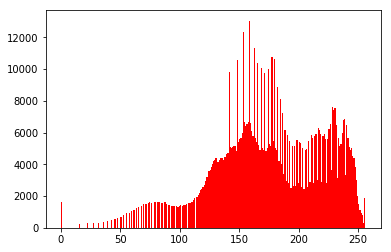

In [14]:
# histogram(统计)直方图
img_small_brighter = cv2.resize(img_brighter, (int(img_brighter.shape[0]*0.5), int(img_brighter.shape[1]*0.5)))
plt.hist(img_brighter.flatten(), 256, [0, 256], color = 'r')              #绘制亮度直方图
img_yuv = cv2.cvtColor(img_small_brighter, cv2.COLOR_BGR2YUV)

# equalize the histogram of the Y channel 均衡Y通道的直方图
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])                         # 这里只均衡了亮度通道

# convert the YUV image back to RGB format将YUV图像转换回RGB格式
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)    # y: luminance(明亮度), u&v: (色彩饱和度)
cv2.imshow('Color input image', img_small_brighter)
cv2.imshow('Histogram equalized', img_output)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [15]:
# rotation 旋转
M = cv2.getRotationMatrix2D((img.shape[1] / 2, img.shape[0] / 2), 30, 1)  #旋转矩阵(center, angle, scale)
print(M)

img_rotate = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
cv2.imshow('rotated_lenna', img_rotate)

# set M[0][2] = M[1][2] = 0

img_rotate2 = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
cv2.imshow('rotated_lenna2', img_rotate2)

key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()
#explain translation

[[  0.8660254    0.5        -93.70250337]
 [ -0.5          0.8660254  162.29749663]]


In [16]:
# scale+rotation+translation = similarity transform 相似变换
M = cv2.getRotationMatrix2D((img.shape[1] / 2, img.shape[0] / 2), 30, 0.5) #M旋转参数(center, angle, scale)
print(M)
img_rotate = cv2.warpAffine(img, M, (img.shape[1], img.shape[0])) #原始图像、变换参数、原始图像宽高

M = np.float32([[1, 0, 34], [0, 1, 56]])                                     #M平移参数([[1, 0, x], [0, 1, y]])        
img_similarity = cv2.warpAffine(img_rotate, M, (img.shape[1], img.shape[0])) #原始图像、变换参数、原始图像宽高

cv2.imshow('similarity_lenna', img_similarity)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()


[[  0.4330127    0.25        81.14874832]
 [ -0.25         0.4330127  209.14874832]]


In [17]:
# Affine Transform 仿射变换(原图中直角关系可能发生改变，但原图中的平行关系仍然平行)
rows, cols, ch = img.shape #原图的高、宽 以及通道数
pts1 = np.float32([[0, 0], [cols - 1, 0], [0, rows - 1]])
pts2 = np.float32([[cols * 0.2, rows * 0.1], [cols * 0.9, rows * 0.2], [cols * 0.1, rows * 0.9]])
 
M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img, M, (cols, rows)) #原始图像、变换参数、原始图像宽高

cv2.imshow('affine lenna', dst)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

In [18]:
# perspective transform 透视变换(原图中的平行和垂直关系都可能发生改变)
def random_warp(img, row, col): #随机透视
    height, width, channels = img.shape

    # warp:
    random_margin = 60
    x1 = random.randint(-random_margin, random_margin)
    y1 = random.randint(-random_margin, random_margin)
    x2 = random.randint(width - random_margin - 1, width - 1)
    y2 = random.randint(-random_margin, random_margin)
    x3 = random.randint(width - random_margin - 1, width - 1)
    y3 = random.randint(height - random_margin - 1, height - 1)
    x4 = random.randint(-random_margin, random_margin)
    y4 = random.randint(height - random_margin - 1, height - 1)

    dx1 = random.randint(-random_margin, random_margin)
    dy1 = random.randint(-random_margin, random_margin)
    dx2 = random.randint(width - random_margin - 1, width - 1)
    dy2 = random.randint(-random_margin, random_margin)
    dx3 = random.randint(width - random_margin - 1, width - 1)
    dy3 = random.randint(height - random_margin - 1, height - 1)
    dx4 = random.randint(-random_margin, random_margin)
    dy4 = random.randint(height - random_margin - 1, height - 1)

    pts1 = np.float32([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
    pts2 = np.float32([[dx1, dy1], [dx2, dy2], [dx3, dy3], [dx4, dy4]])
    M_warp = cv2.getPerspectiveTransform(pts1, pts2)
    img_warp = cv2.warpPerspective(img, M_warp, (width, height))
    return M_warp, img_warp

M_warp, img_warp = random_warp(img, img.shape[0], img.shape[1])
cv2.imshow('lenna_warp', img_warp)
print (M_warp)

key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

[[ 1.20312368e+00  1.33556220e-01 -5.00700680e+01]
 [ 2.12603046e-01  1.10812482e+00 -2.84633135e+01]
 [ 2.66303340e-04  6.18783051e-05  1.00000000e+00]]
